# ML Pipeline

<a href="https://colab.research.google.com/github/simecek/dspracticum2023/blob/main/lesson10/ds_practicum_ex_ml_pipeline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset `titanic`: https://www.kaggle.com/competitions/titanic/data

Dataset `spaceship-titanic`: https://www.kaggle.com/competitions/spaceship-titanic/data

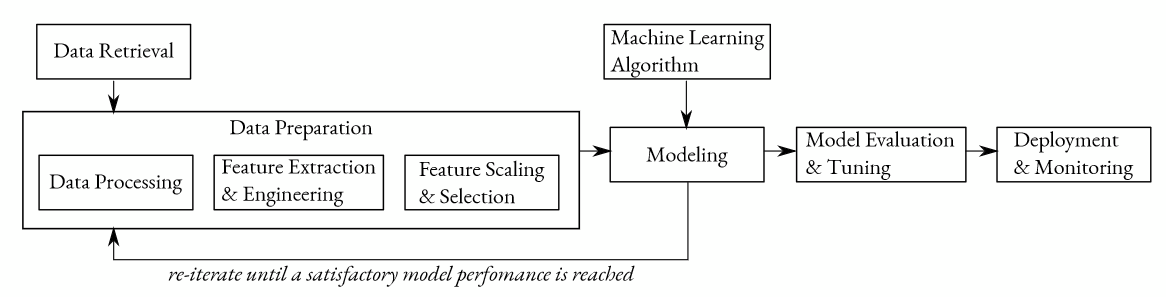

Download the dataset:

In [1]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

######################################################
# TODO: choose a dataset - Titanic or Space Titanic: #
######################################################
# DATASET = 'titanic'
DATASET = 'spaceship-titanic'

!kaggle competitions download -c {DATASET} -p {'.'}

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 113MB/s]


In [2]:
import zipfile

dataset_path = '/content/data_preparation_exercise/'


with zipfile.ZipFile(DATASET + '.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [3]:
import pandas as pd

csv_filepath = dataset_path + 'train.csv'
df = pd.read_csv(csv_filepath)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## 0. Data Exploration


In [4]:
######################################
# TODO: get insights to your dataset #
######################################
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.info() # vidíme missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df['VIP'] = df['VIP'].apply(lambda x: bool(x))
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: bool(x))

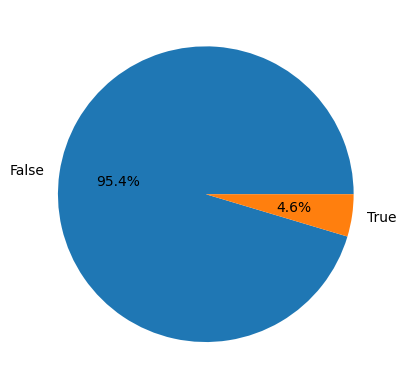

In [8]:
import matplotlib.pyplot as plt

default_plt_size = plt.rcParams['figure.figsize']

plt.pie(df['VIP'].value_counts().values, labels=df['VIP'].value_counts().index, autopct='%.1f%%')
plt.show()


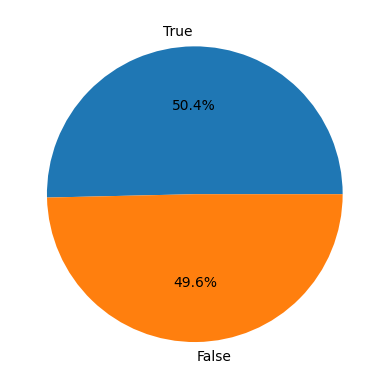

In [9]:
default_plt_size = plt.rcParams['figure.figsize']

plt.pie(df['Transported'].value_counts().values, labels=df['Transported'].value_counts().index, autopct='%.1f%%')
plt.show()

<Axes: xlabel='HomePlanet', ylabel='Count'>

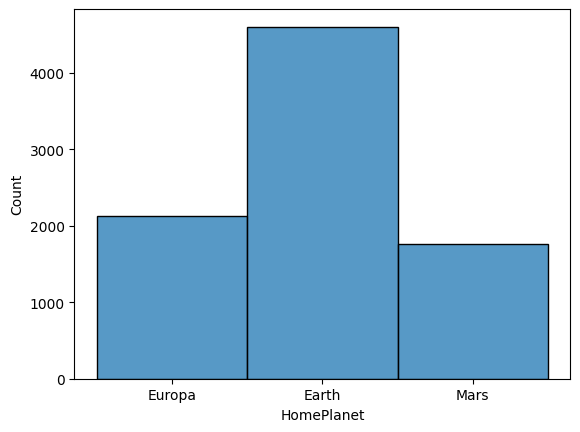

In [10]:
import seaborn as sns

sns.histplot(data=df, x='HomePlanet')

<Axes: xlabel='HomePlanet', ylabel='Count'>

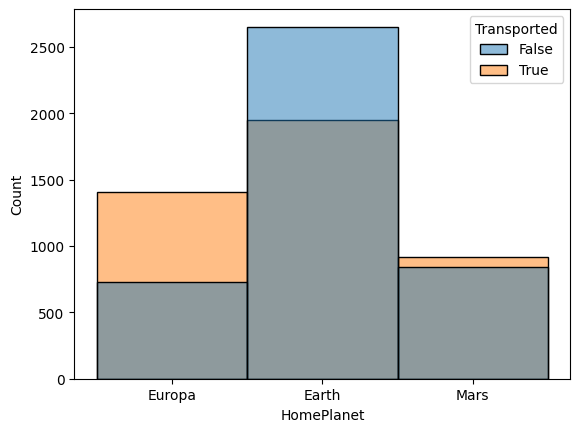

In [11]:
sns.histplot(data=df, x='HomePlanet', hue='Transported')

<Axes: xlabel='Destination', ylabel='Count'>

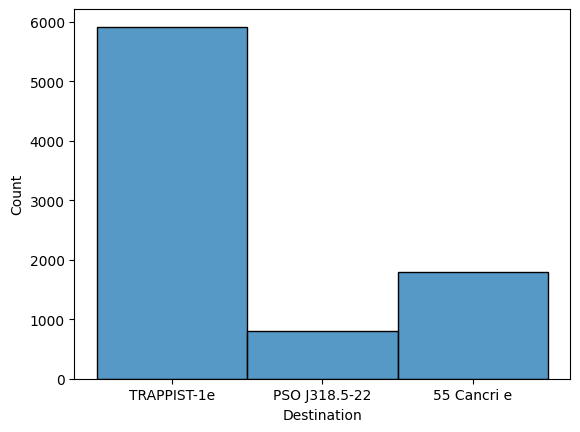

In [12]:
sns.histplot(data=df, x='Destination')    # The planet the passenger will be debarking to.

<Axes: xlabel='Age', ylabel='Count'>

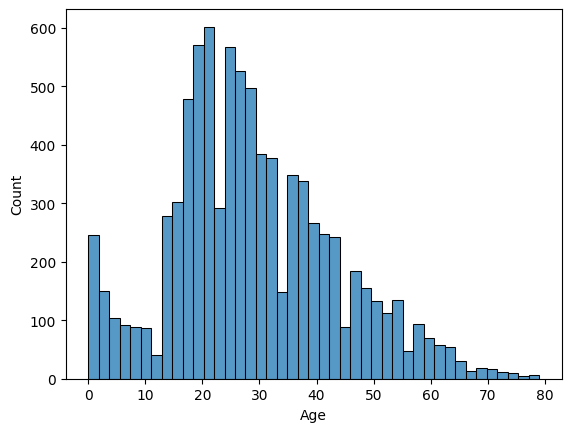

In [13]:
sns.histplot(data=df, x='Age')

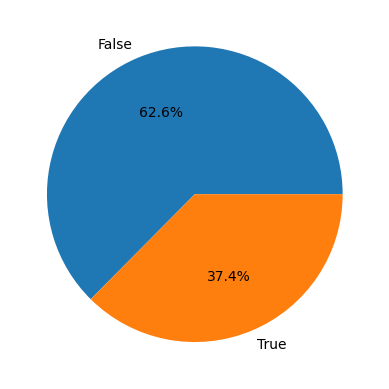

In [14]:
default_plt_size = plt.rcParams['figure.figsize']

plt.pie(df['CryoSleep'].value_counts().values, labels=df['CryoSleep'].value_counts().index, autopct='%.1f%%')
plt.show()

## 1. Data Cleaning

In [ ]:
###########################
# TODO: handle duplicates #
###########################

In [15]:
df.loc[df.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [ ]:
#############################
# TODO: handle missing data #
#############################

In [16]:
missing_values = df.isna().sum()
missing_values

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
df = df.drop('Name', axis=1)

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())

df['Destination'] = df['Destination'].fillna("Unknown")
df['HomePlanet'] = df['HomePlanet'].fillna("Unknown")
df['Cabin'] = df['Cabin'].fillna("Unknown")

missing_values = df.isna().sum()
missing_values

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## 2. Feature manipulation

#### Categorical features encoding:

(`object` type from `df.info()`)

In [19]:
df_transformed = df.copy()

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):
    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns
        return result

In [ ]:
#####################################
# TODO: encode categorical features #
#####################################

In [21]:
ohe_planet = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_planet_df = pd.DataFrame(ohe_planet.fit_transform(df_transformed[['HomePlanet']]))
df_transformed = df_transformed.join(ohe_planet_df)

Index(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Unknown'],
      dtype='object')


In [22]:
ohe_destination = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_destination_df = pd.DataFrame(ohe_destination.fit_transform(df_transformed[['Destination']]))
df_transformed = df_transformed.join(ohe_destination_df)

Index(['Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_Unknown'],
      dtype='object')


In [23]:
df_transformed = df_transformed[df_transformed.columns.drop(['HomePlanet','Destination'])]
df_transformed.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,0,1,0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,0,1,0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,0,1,0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,0,1,0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,0,1,0


#### Numerical feature scaling:

In [ ]:
##################################
# TODO: scale numerical features #
##################################

In [24]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

<Axes: xlabel='Age', ylabel='Count'>

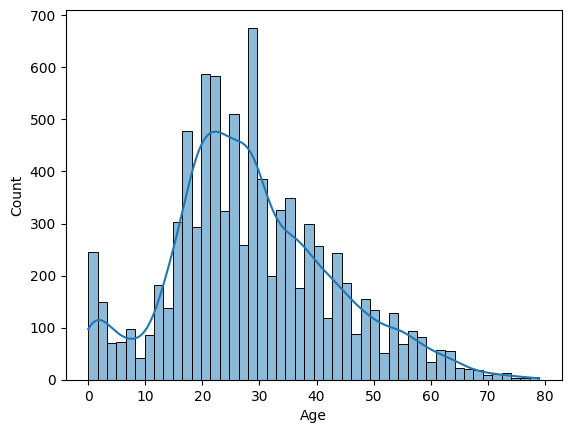

In [25]:
sns.histplot(data=df, x='Age', kde=True)

In [26]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler(copy=True)
df_transformed.loc[:,numerical_features] = standard_scaler.fit_transform(df_transformed[numerical_features])
df_transformed.loc[:,numerical_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023
1,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194
2,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782
3,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708
4,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258
...,...,...,...,...,...,...
8688,0.848924,-0.340590,3.989682,-0.290817,1.184286,-0.203720
8689,-0.755179,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023
8690,-0.197230,-0.340590,-0.287314,2.842851,-0.275774,-0.269023
8691,0.221232,-0.340590,0.370637,-0.290817,0.037223,2.585740


In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
df_transformed.loc[:,numerical_features] = min_max_scaler.fit_transform(df_transformed[numerical_features])
df_transformed.loc[:,numerical_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083
...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049


## 3. Feature Selection

In [ ]:
##############################################################
# TODO: choose what features will be used to build the model #
##############################################################

In [28]:
corr = df_transformed.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-28-617f253f4ccf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_transformed.corr()


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
CryoSleep,1.000000,-0.072933,-0.050342,-0.240852,-0.202540,-0.205611,-0.196949,-0.190670,0.451744,-0.107932,0.094665,0.031692,0.002785,0.064069,0.085744,-0.100486,-0.026775
Age,-0.072933,1.000000,0.058410,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249,-0.200235,0.217444,0.016081,-0.000361,0.016709,-0.028247,-0.001036,0.012990
VIP,-0.050342,0.058410,1.000000,0.050345,0.088525,-0.001092,0.037249,0.086757,-0.024602,-0.107343,0.094805,0.033617,-0.004720,0.033471,0.006058,-0.029993,-0.009245
RoomService,-0.240852,0.067612,0.050345,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,-0.137916,-0.067476,0.245451,-0.004954,-0.024288,-0.062828,0.061162,-0.003900
FoodCourt,-0.202540,0.127937,0.088525,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,-0.208942,0.365500,-0.124781,-0.018672,0.134994,-0.065542,-0.073620,-0.010244
ShoppingMall,-0.205611,0.032655,-0.001092,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.069041,-0.021019,0.111257,-0.007951,-0.013346,-0.031397,0.032770,-0.005714
Spa,-0.196949,0.120992,0.037249,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,-0.155361,0.266323,-0.088140,-0.010697,0.075242,-0.053428,-0.034492,0.007020
VRDeck,-0.190670,0.099210,0.086757,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,-0.152280,0.282118,-0.111875,-0.002694,0.089818,-0.045454,-0.046643,-0.010716
Transported,0.451744,-0.074249,-0.024602,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000,-0.169019,0.176916,0.019544,0.002712,0.108722,0.000092,-0.094700,0.000547
HomePlanet_Earth,-0.107932,-0.200235,-0.107343,-0.137916,-0.208942,-0.069041,-0.155361,-0.152280,-0.169019,1.000000,-0.604411,-0.534195,-0.163174,-0.149534,0.232218,-0.015000,0.004267


In [ ]:
#sns.pairplot(df_transformed, hue='Transported')

## 5. Splitting data to train and test sets (dataset sampling)

In [ ]:
#########################################################################
# TODO: split the data to train and test sets (the real test set is not #
# available for us before submission)                                   #
# for 'titanic' dataset, we are predicting the 'Survived' column,       #
# for 'spaceship-titanic' the 'Transported' column                      #
#########################################################################

In [29]:
from sklearn.model_selection import train_test_split

labels = df_transformed['Transported']
dff = df_transformed[df_transformed.columns.drop(['Transported','Cabin','PassengerId'])]


x_train, x_test, y_train, y_test = train_test_split(dff, labels, test_size=0.2)

## 6. Model

In [ ]:
#############################################################################
# TODO: propose some appropriate solution and give reasoning why it is      #
# suitable to be used here (+ discuss at least one other approach you could #
# have taken instead) and train the model                                   #
# - try to reach 80%+ accuracy on your test set                             #
#############################################################################

In [30]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2')
classifier_lr

LogisticRegression(C=10, random_state=0)

In [31]:
classifier_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=0)

Accuracy: 78.838 %


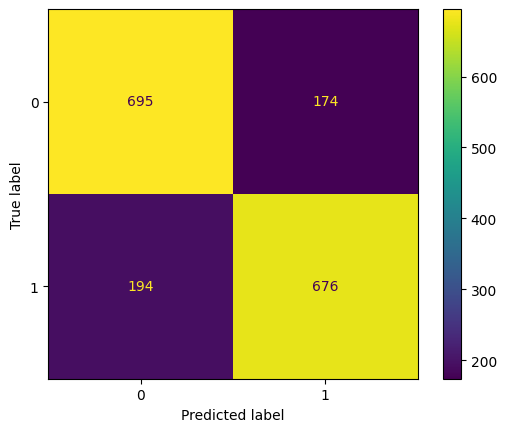

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

## 7. Interpretation

In [ ]:
##############################################################################
# TODO: interpret your model - describe what are the most important features #
# for its decisions                                                          #
##############################################################################

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier_lr,
                                x_test,
                                y_test,
                                n_repeats=20,
                                # random_state=42,
                                n_jobs=2)

elapsed_time = time.time() - start_time
print(f'Elapsed time to compute the importances: {elapsed_time:.3f} seconds')

result

Elapsed time to compute the importances: 7.129 seconds


{'importances_mean': array([ 0.07484186,  0.00836688, -0.00074756,  0.04387579,  0.01506613,
         0.00830937,  0.04232317,  0.04804485,  0.00491662,  0.01589994,
         0.00112133, -0.00112133,  0.00477286,  0.00025877,  0.00258769,
        -0.00046003]),
 'importances_std': array([0.00920118, 0.00272448, 0.00126117, 0.00366   , 0.00268244,
        0.00268783, 0.00531534, 0.00443371, 0.00469101, 0.00560564,
        0.00069185, 0.00076017, 0.00253345, 0.00064227, 0.00154835,
        0.00043032]),
 'importances': array([[ 0.08165612,  0.07878091,  0.09373203,  0.06325474,  0.07418056,
          0.07188039,  0.08050604,  0.07648074,  0.06037953,  0.07878091,
          0.07418056,  0.0879816 ,  0.0879816 ,  0.05922944,  0.07130535,
          0.05980449,  0.07590569,  0.06958022,  0.07820587,  0.07303048],
        [ 0.00747556,  0.00345026,  0.00977573,  0.01092582,  0.00632547,
          0.00632547,  0.01150086,  0.00690052,  0.00862565,  0.00977573,
          0.00575043,  0.01035078

In [ ]:
feature_importances = pd.Series(result.importances_mean, index=dff.columns)
feature_importances

CryoSleep                    0.074842
Age                          0.008367
VIP                         -0.000748
RoomService                  0.043876
FoodCourt                    0.015066
ShoppingMall                 0.008309
Spa                          0.042323
VRDeck                       0.048045
HomePlanet_Earth             0.004917
HomePlanet_Europa            0.015900
HomePlanet_Mars              0.001121
HomePlanet_Unknown          -0.001121
Destination_55 Cancri e      0.004773
Destination_PSO J318.5-22    0.000259
Destination_TRAPPIST-1e      0.002588
Destination_Unknown         -0.000460
dtype: float64

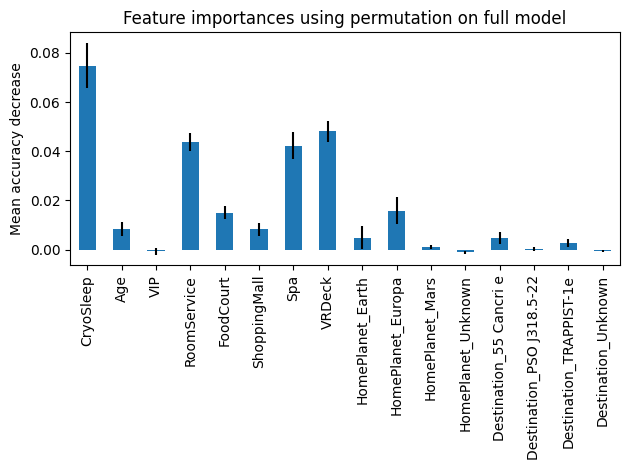

In [ ]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

Zkusíme použít decision trees místo logistické regrese

In [45]:
csv_filepath = dataset_path + 'train.csv'
df = pd.read_csv(csv_filepath)
df = df.drop(['PassengerId', 'Name'], axis=1)

df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df.isnull().sum().sort_values(ascending=False)


HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [49]:
label = "Transported"
df[label] = df[label].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [52]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [55]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(

                                                                len(train_ds_pd), len(valid_ds_pd)))

6918 examples in training, 1775 examples in testing.


In [60]:
!pip install tensorflow_decision_forests tensorflow

import tensorflow as tf
import tensorflow_decision_forests as tfdf

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [87]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [105]:
rf = tfdf.keras.GradientBoostedTreesModel()
rf.compile(metrics='accuracy')
rf.fit(x=train_ds)

Use /tmp/tmp_sspk28a as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.527928. Found 6918 examples.
Training model...
Model trained in 0:00:36.074434
Compiling model...
Model compiled.


In [106]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

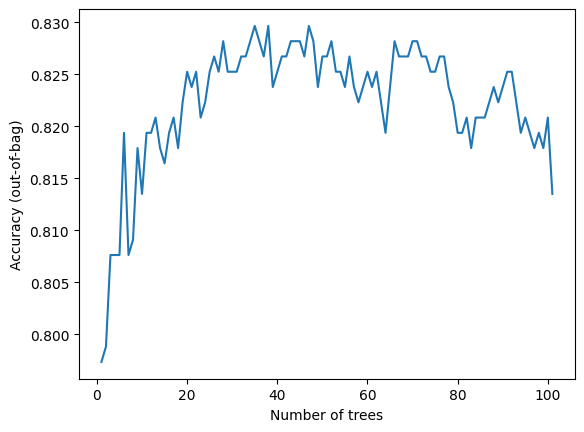

In [107]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [108]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.8281938433647156, loss=0.7753691673278809, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [109]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.7848
loss: 0.0000
accuracy: 0.7848


In [110]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 22.0),
 ("VRDeck" (1; #12), 16.0),
 ("Spa" (1; #10), 13.0),
 ("Cabin_num" (4; #1), 9.0),
 ("RoomService" (1; #7), 4.0),
 ("Age" (1; #0), 3.0),
 ("Side" (4; #9), 3.0),
 ("Destination" (4; #4), 1.0)]